In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [30]:
#Hough transform

coins = cv.imread("coins_1.jfif")

gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

# hough circle transform
row = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150,
                        param2 = 25)

# plot all the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw circles center
        center = (i[0], i[1])
        cv.circle(coins, center, 1, (100, 100, 255), 3)
        # draw the circle 
        radius = i[2]
        cv.circle(coins, center, radius, (0, 255, 0), 2)
        
cv.imshow("Circular objects detection", coins)
cv.waitKey()

-1

In [31]:
#Blob detection

coins = cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(coins, (7, 7), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

params = cv.SimpleBlobDetector_Params()


params.filterByArea = True
params.minArea = 150
params.maxArea = 2000
params.filterByColor = False

# create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw keypoints
blank = np.zeros((1,1))
im_with_keypoints = cv.drawKeypoints(coins, keypoints, blank, (0, 0, 255), 
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('Blob detection', im_with_keypoints)
cv.waitKey(0)


-1

Comment on the outcome:

1. Hough transform = detect the center point of the circle and the outline of the circle

2. Blob detection algorithm = only detect the outline of the circle

## 2. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.

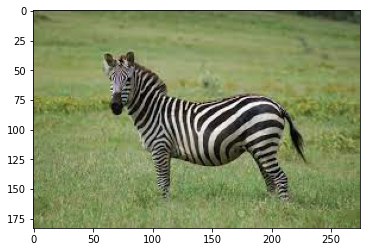

In [32]:
zebra = cv.imread('zebra.jfif')
zebra_rgb = cv.cvtColor(zebra, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(zebra_rgb)
plt.show()

In [33]:
# reshape 
zebra_reshape = zebra_rgb.reshape((-1, 3))
zebra_reshape = np.float32(zebra_reshape)


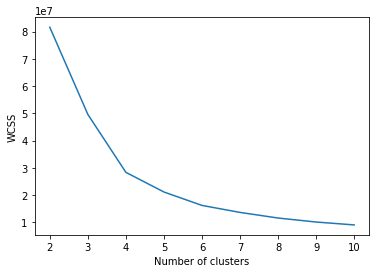

In [34]:
#find optimal k

WithinClusterSumOfSquares = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(zebra_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    WithinClusterSumOfSquares.append(ret)

plt.plot(range(2, 11), WithinClusterSumOfSquares)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

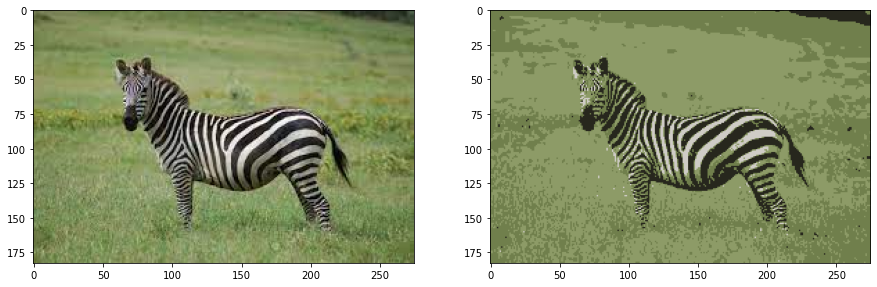

In [35]:
# k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(zebra_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
result = res.reshape(zebra_rgb.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(zebra_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [36]:
from numpy import linalg as LN
white = (255, 255, 255)
Idx_min_white = np.argmin(LN.norm(center-white, axis = 1))

black = (0, 0, 0)
Idx_min_black = np.argmin(LN.norm(center-black, axis = 1))

In [37]:
mask_white = result == center[Idx_min_white]

mask_black = result == center[Idx_min_black]

mask = cv.bitwise_or(np.float32(mask_white), np.float32(mask_black))
seg_zebra = zebra*(mask.astype("uint8"))

cv.imshow('segmentation', seg_zebra)
cv.waitKey(0)

13

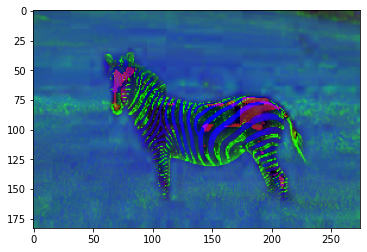

In [2]:
#HSV color space
zebra = cv.imread('zebra.jfif')
zebra_hsv = cv.cvtColor(zebra, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(zebra_hsv)
plt.show()

In [3]:
# reshape 
zebra_reshape = zebra_hsv.reshape((-1, 3))
zebra_reshape = np.float32(zebra_reshape)


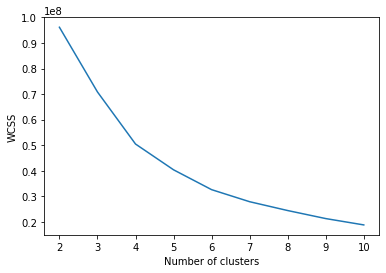

In [4]:
#find optimal k

WithinClusterSumOfSquares = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(zebra_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    WithinClusterSumOfSquares.append(ret)

plt.plot(range(2, 11), WithinClusterSumOfSquares)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

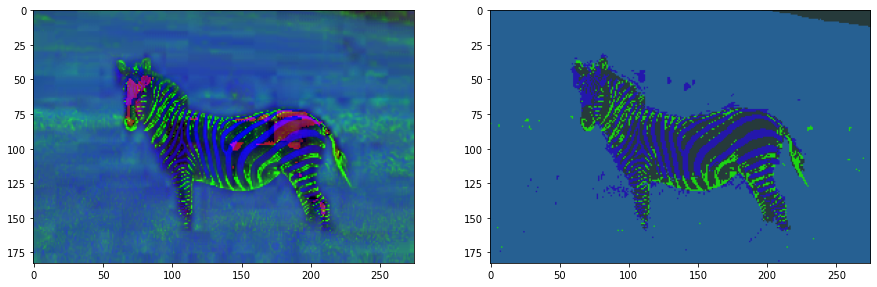

In [5]:
# k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(zebra_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
result = res.reshape(zebra_hsv.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(zebra_hsv)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [6]:
from numpy import linalg as LN
white = (0, 0, 0)
Idx_min = np.argmin(LN.norm(center-white, axis = 1))


In [7]:
mask = result == center[Idx_min]
seg_zebra = zebra*(mask.astype("uint8"))

#change back to rgb to display
seg_result = cv.cvtColor(seg_zebra, cv.COLOR_HSV2BGR)
cv.imshow('segmentation', seg_result)
cv.waitKey(0)

-1

Compare the result
1. RGB color space = black and white segmentation
2. HSV color space = greenish segmentation